In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
import json
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
print('loading data...')
data_train = json.load(open('/Users/tyt15771/Documents/VS_ECFP/src/scoring/target_test_set/data_train.json', 'r'))
print('1')
class_train = json.load(open('/Users/tyt15771/Documents/VS_ECFP/src/scoring/target_test_set/class_train.json', 'r'))
print('2')
data_test = json.load(open('/Users/tyt15771/Documents/VS_ECFP/src/scoring/target_test_set/data_test.json', 'r'))
print('3')
class_test = json.load(open('/Users/tyt15771/Documents/VS_ECFP/src/scoring/target_test_set/class_test.json', 'r'))

print('data loaded', len(data_train), len(data_test))

loading data...
1
2
3
data loaded 35038 79875


Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_train, class_train)

In [ ]:
res = clf.predict(data_test, class_test)

Scaling...

In [3]:
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(data_train)  
data_train = scaler.transform(data_train)  
# apply same transformation to test data
data_test = scaler.transform(data_test)
print('scaled')

scaled


MLP

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)


clf.fit(data_train, class_train)
print('trained')

trained


In [5]:
res = clf.predict(data_test)
print('predicted')
prob = clf.predict_proba(data_test)

predicted


In [22]:
print(len(class_test))
pos_pred = []
pos_prob0 = []
pos_prob1 = []
for i in range(len(class_test)):
    if class_test[i] == 1:
        pos_pred.append(res[i])
        pos_prob0.append(prob[i][0])
        pos_prob1.append(prob[i][1])

79875


In [23]:
len(pos_pred), len(pos_prob0)

(479, 479)

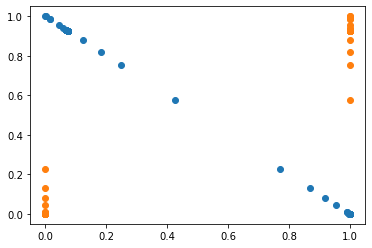

In [27]:
plt.scatter(pos_prob0, pos_prob1)
plt.scatter(pos_pred, pos_prob1)

In [28]:
clf = svm.SVC()

clf.fit(data_train, class_train)
print('trained')

In [ ]:
svm_res = clf.predict(data_test)
print('predicted')